In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# df = pd.read_csv('/Users/bear-mbp/Library/Mobile Documents/com~apple~CloudDocs/Python/amzn_reviews_ds.csv')
df = pd.read_csv('/Users/bear-mbp/Downloads/amzn_reviews_ds.csv')

In [3]:
df.drop_duplicates(subset=['product_title', 'product_category'], inplace=True, keep=False)

In [4]:
df = df[~((df.product_category == 'Video_Games') & (df.percent_rank == 0))]

In [5]:
len(df)

5513

In [6]:
df['cnt_log'] = np.log(df.cnt)

In [7]:
df1 = df[[
    'product_category',
    'cnt', 
    'helpful_votes_cnt',
    'total_votes_cnt',
    'verified_purchase_cnt',
    'vine_cnt',
    'star_rating_mean',
    'helpful_votes_mean',
    'total_votes_mean',
    'star_rating_with_verified_purchase_mean',
    'star_rating_with_vine_mean',
    'star_rating_with_votes_mean',
    'star_rating_helpful_votes_weighted_mean',
    'helpful_votes_ratio',
    'verified_purchase_ratio',
    'vine_ratio',
    'cnt_log'
]].isnull().describe()

df1.loc[['count', 'freq'],:].sum() - 11026.0

product_category                             0.0
cnt                                          0.0
helpful_votes_cnt                            0.0
total_votes_cnt                              0.0
verified_purchase_cnt                        0.0
vine_cnt                                     0.0
star_rating_mean                             0.0
helpful_votes_mean                           0.0
total_votes_mean                             0.0
star_rating_with_verified_purchase_mean   -704.0
star_rating_with_vine_mean                 -66.0
star_rating_with_votes_mean                  0.0
star_rating_helpful_votes_weighted_mean      0.0
helpful_votes_ratio                       -282.0
verified_purchase_ratio                      0.0
vine_ratio                                   0.0
cnt_log                                      0.0
dtype: float64

In [8]:
training_target = ['percent_rank']

# Feature Selection with ExtraTreesRegressor

Feature ranking:
0. feature star_rating_mean (0.286688)
1. feature star_rating_helpful_votes_weighted_mean (0.076297)
2. feature total_votes_mean (0.072326)
3. feature verified_purchase_ratio (0.067470)
4. feature star_rating_with_votes_mean (0.061680)
5. feature product_category (0.060814)
6. feature star_rating_with_verified_purchase_mean (0.059585)
7. feature helpful_votes_ratio (0.055858)
8. feature total_votes_cnt (0.047768)
9. feature helpful_votes_mean (0.047504)
10. feature cnt_log (0.045871)
11. feature helpful_votes_cnt (0.041194)
12. feature verified_purchase_cnt (0.035696)
13. feature cnt (0.033269)
14. feature vine_cnt (0.003050)
15. feature star_rating_with_vine_mean (0.002569)
16. feature vine_ratio (0.002361)


/Users/bear-mbp/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/bear-mbp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bear-mbp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


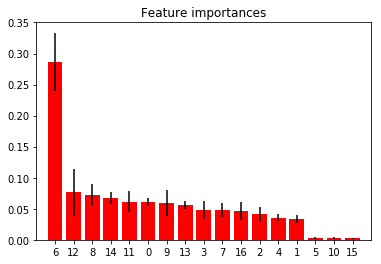

In [9]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

training_ds = df[df.cnt >= 20.]
training_ds.reset_index(inplace=True, drop=True)
training_ds.fillna(0, inplace=True)

# scale input variables
# scaler = StandardScaler()
# scaler.fit(training_ds)
# X = scaler.transform(training_ds[training_features])
training_features = [
    'product_category',
    'cnt', 
    'helpful_votes_cnt',
    'total_votes_cnt',
    'verified_purchase_cnt',
    'vine_cnt',
    'star_rating_mean',
    'helpful_votes_mean',
    'total_votes_mean',
    'star_rating_with_verified_purchase_mean',
    'star_rating_with_vine_mean',
    'star_rating_with_votes_mean',
    'star_rating_helpful_votes_weighted_mean',
    'helpful_votes_ratio',
    'verified_purchase_ratio',
    'vine_ratio',
    'cnt_log'
]

X = training_ds[training_features]
le = LabelEncoder()
le.fit(X['product_category'])
X['product_category'] = le.transform(X['product_category'])
y = training_ds[training_target]

forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f, training_features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [10]:
# training_features = ['cnt_log', 'star_rating_mean', 'verified_purchase_ratio', 'total_votes_mean']
training_features = ['cnt_log', 'star_rating_mean', 'verified_purchase_ratio', 'total_votes_mean',
                     'product_category', 'helpful_votes_ratio']


# Find significant count cut off

/Users/bear-mbp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bear-mbp/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


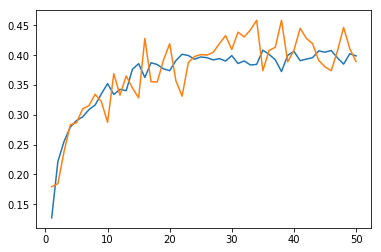

In [11]:
training_scores = []
test_scores = []
features_used = []
exclude_cnts = range(1, 51)

for exclude_cnt in exclude_cnts: 
    # select feature and target columns
#     training_features = ['cnt_log', 'star_rating_mean', 'verified_purchase_ratio', 'total_votes_mean']
#     training_target = ['percent_rank']
    training_ds = df[df.cnt >= exclude_cnt]
    training_ds.reset_index(inplace=True, drop=True)
    
    if 'product_category' in training_ds:
        le = LabelEncoder()
        le.fit(training_ds['product_category'])
        training_ds['product_category'] = le.transform(training_ds['product_category'])
        
    training_ds.fillna(0, inplace=True)
    
    # scale input variables
    scaler = StandardScaler()
    scaler.fit(training_ds[training_features])
    X = scaler.transform(training_ds[training_features])
    y = training_ds[training_target]
    
#     poly = PolynomialFeatures(2)
#     X = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # train a model to learn from the dataset
    clf = linear_model.Lasso(alpha=0.01)
    clf.fit(X_train,y_train)
    train_score=clf.score(X_train,y_train)
    test_score=clf.score(X_test,y_test)
    coeff_used = np.sum(clf.coef_!=0)
    
    training_scores.append(train_score)
    test_scores.append(test_score)
    features_used.append(coeff_used)
    # # print best features
    # print("\ntop features:")
    # for coef in reversed(sorted(clf.coef_)):
    #     if coef > 0:
    #         coef_index = list(clf.coef_).index(coef)
    #         print("{} ({})".format(training_features[coef_index], coef))
    
plt.plot(exclude_cnts, np.clip(training_scores, 0, 1.))
plt.plot(exclude_cnts, np.clip(test_scores, 0, 1.))
plt.show()

In [12]:
significant_cut_off = 20

# Train using polynomial features and Lasso

In [14]:
# select feature and target columns
# training_features = ['cnt_log', 'star_rating_mean', 'verified_purchase_cnt', 'helpful_votes_mean', 'total_votes_mean']
training_target = ['percent_rank']
training_ds = df[df.cnt >= significant_cut_off]
training_ds = pd.concat([training_ds[training_ds['product_category'] != 'Video_DVD'],
                         training_ds[training_ds['product_category'] == 'Video_DVD'].sample(300)])
training_ds.reset_index(inplace=True, drop=True)

if 'product_category' in training_ds:
    le = LabelEncoder()
    le.fit(training_ds['product_category'])
    training_ds['product_category'] = le.transform(training_ds['product_category'])

# scale input variables
scaler = StandardScaler()
scaler.fit(training_ds[training_features])
X = scaler.transform(training_ds[training_features])
y = training_ds[training_target]

poly = PolynomialFeatures(2)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a model to learn from the dataset
clf = linear_model.Lasso(alpha=0.01)
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
coeff_used = np.sum(clf.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

# # print best features
# print("\ntop features:")
# for coef in reversed(sorted(clf.coef_)):
#     if coef > 0:
#         coef_index = list(clf.coef_).index(coef)
#         print("{} ({})".format(training_features[coef_index], coef))

training score: 0.43031173757382724
test score:  0.40141707359741896
number of features used:  17


In [15]:
# Sample Predictions
training_pred_values = np.clip(clf.predict(X_train), 0., 1.)
training_pred_values = np.array(list(zip(training_pred_values, y_train.as_matrix().reshape(-1,))))
print('training_pred')
print(training_pred_values[:10])

test_pred_values = np.clip(clf.predict(X_test), 0., 1.)
test_pred_values = np.array(list(zip(test_pred_values, y_test.as_matrix().reshape(-1,))))
print('test_pred')
print(test_pred_values[:10])

training_pred
[[0.64097106 0.72060994]
 [0.6338868  0.83431662]
 [0.7436763  0.90029003]
 [0.50735559 0.39428009]
 [0.41673569 0.35577261]
 [0.43236181 0.49385447]
 [0.70717075 0.99839984]
 [0.51511863 0.43384338]
 [0.6357124  0.99389939]
 [0.39076341 0.03490659]]
test_pred
[[0.         0.00780078]
 [0.7045462  0.68216822]
 [0.68058224 0.45184518]
 [0.42034825 0.08207434]
 [0.31818064 0.57125713]
 [0.67000041 0.72603245]
 [0.11949891 0.15363815]
 [0.68396227 0.22436933]
 [0.68136083 0.68378891]
 [0.55666035 0.12866278]]


/Users/bear-mbp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/Users/bear-mbp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


training


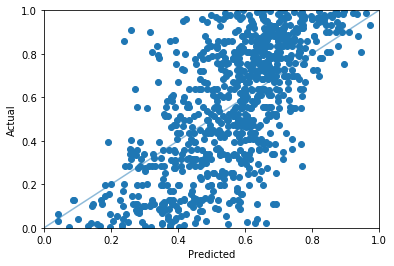

test


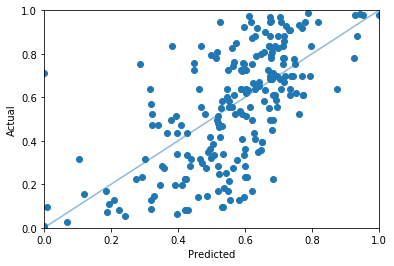

In [16]:
print('training')
X_train
plt.scatter(training_pred_values[:,0], training_pred_values[:,1])
plt.plot([0.,1.], [0.,1.], alpha=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xlim([0., 1.])
plt.ylim([0., 1.])
plt.show()

print('test')
plt.scatter(test_pred_values[:,0], test_pred_values[:,1])
plt.plot([0.,1.], [0.,1.], alpha=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xlim([0., 1.])
plt.ylim([0., 1.])
plt.show()

In [17]:
regression_metrics = explained_variance_score, mean_absolute_error, r2_score

for metric in regression_metrics:
    print(metric)    
    print('train', metric(y_train, training_pred_values[:,0]))
    print('test', metric(y_test, test_pred_values[:,0]))

<function explained_variance_score at 0x125516730>
train 0.43031173757382724
test 0.4135636121762569
<function mean_absolute_error at 0x125516510>
train 0.17965550593921534
test 0.16437753325108015
<function r2_score at 0x1255167b8>
train 0.43031173757382724
test 0.41063614591957875


# Try different linear models

In [18]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

#X_train, X_test, y_train, y_test
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print('LinearRegression:', lin_reg.score(X_test, y_test))

ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
print('Ridge:', ridge.score(X_test, y_test))

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print('Lasso:', lasso.score(X_test, y_test))

elastic_net = linear_model.ElasticNet(alpha=0.1)
elastic_net.fit(X_train, y_train)
print('ElasticNet:', elastic_net.score(X_test, y_test))

lasso_lars = linear_model.LassoLars()
lasso_lars.fit(X_train, y_train)
print('LassoLars:', lasso_lars.score(X_test, y_test))

bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
print('BayesianRidge:', bayesian_ridge.score(X_test, y_test))

svc = svm.SVR(kernel='linear')
svc.fit(X_train, y_train)
print('SVR:', svc.score(X_test, y_test))

dtr = tree.DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('DTR:', dtr.score(X_test, y_test))

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gbr.fit(X_train, y_train)
print('GBR:', gbr.score(X_test, y_test))

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
print('MLP:', mlp.score(X_test, y_test))

LinearRegression: 0.23676406155918828
Ridge: 0.23839352095524236
Lasso: 0.14013574646540305
ElasticNet: 0.24649900064611782
LassoLars: -0.001799449821275445
BayesianRidge: 0.2668116436773379
SVR:

/Users/bear-mbp/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bear-mbp/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bear-mbp/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 0.37538390775743935
DTR: -0.3419349099524267
GBR: 0.4058446540110684
MLP: -0.56111148326663


/Users/bear-mbp/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Compare separating categories

0
267 267


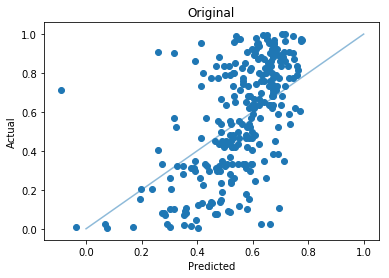

train_score:  0.43551170690882546
coeff_used:  13
(267, 28) (267,)


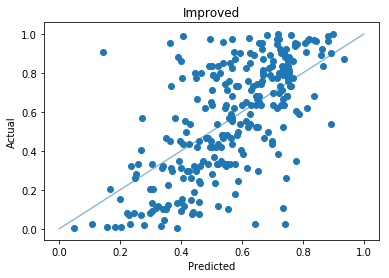

2
504 504


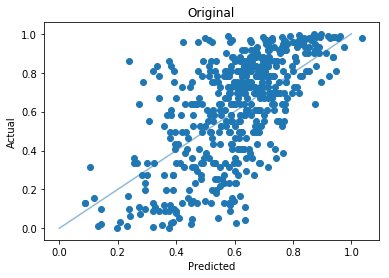

train_score:  0.4279340946417671
coeff_used:  11
(504, 28) (504,)


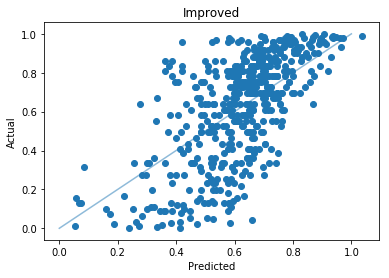

1
300 300


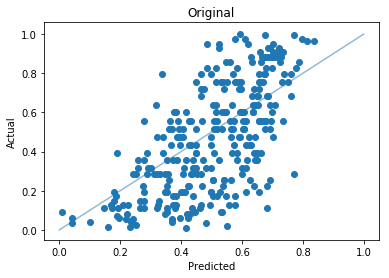

train_score:  0.49904794225425564
coeff_used:  12
(300, 28) (300,)


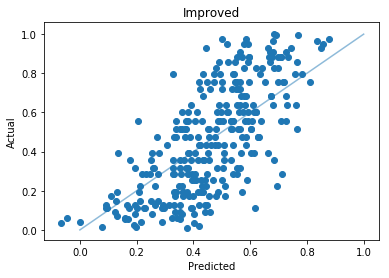

In [20]:
X_preds = np.clip(clf.predict(X), 0, 1.)
X_pred_values = np.array(list(zip(y.values.reshape(-1), X_preds)))
norms = np.abs(X_pred_values[:,0] - X_pred_values[:,1])
norms_args = np.argsort(norms)

training_ds_pred = training_ds.copy()
training_ds_pred['pred'] = X_preds
training_ds_pred.iloc[norms_args[-20:]]
# training_ds_pred.iloc[norms_args[:5]]
# [x for _,x in sorted(zip(norms,training_pred_values))]

,product_id,product_id.1,product_title,product_category,product_id.2,cnt,helpful_votes_cnt,total_votes_cnt,verified_purchase_cnt,vine_cnt,...,star_rating_with_vine_mean,star_rating_with_votes_mean,star_rating_helpful_votes_weighted_mean,helpful_votes_ratio,verified_purchase_ratio,vine_ratio,product_title.1,percent_rank,cnt_log,pred
420,B0018YXM3Y,B0018YXM3Y,Empire: Total War,2,B0018YXM3Y,375,2889,4601,123,0,...,NaN,15.413333,1.470766,0.627907,0.328000,0.0,Empire: Total War,0.959194,5.926926,0.473142
568,B00004W4WI,B00004W4WI,Theme Park Roller Coaster,2,B00004W4WI,49,234,296,12,0,...,NaN,22.102041,2.774589,0.790541,0.244898,0.0,Theme Park Roller Coaster,0.808751,3.891820,0.321389
912,B00005AQMJ,B00005AQMJ,And the Band Played On,1,B00005AQMJ,199,417,750,141,0,...,NaN,14.457286,3.070515,0.556000,0.708543,0.0,And the Band Played On,0.283536,5.293305,0.770964
132,B00005O623,B00005O623,Jonny Moseley Mad Trix,2,B00005O623,21,53,113,1,0,...,NaN,14.000000,2.621362,0.469027,0.047619,0.0,Jonny Moseley Mad Trix,0.052852,3.044522,0.543479
669,B0030GBTYC,B0030GBTYC,Calling,2,B0030GBTYC,32,121,180,22,0,...,NaN,19.968750,3.265389,0.672222,0.687500,0.0,Calling,0.088004,3.465736,0.584356
408,0700026657,0700026657,Anno 2070,2,0700026657,51,190,268,43,0,...,NaN,11.254902,3.124064,0.708955,0.843137,0.0,Anno 2070,0.834317,3.931826,0.335876
559,B00005ME8I,B00005ME8I,Digimon Digital Card Battle,2,B00005ME8I,22,44,105,2,0,...,NaN,13.318182,2.836275,0.419048,0.090909,0.0,Digimon Digital Card Battle,0.108284,3.091042,0.634630
1013,B00Q6T8VD2,B00Q6T8VD2,Not Cool,1,B00Q6T8VD2,25,10,33,18,0,...,NaN,5.920000,2.924000,0.303030,0.720000,0.0,Not Cool,0.018481,3.218876,0.550469
337,B004DDIYP8,B004DDIYP8,Total War: Shogun 2,2,B004DDIYP8,69,254,680,49,0,...,NaN,11.637681,2.372424,0.373529,0.710145,0.0,Total War: Shogun 2,0.959194,4.234107,0.424558
324,0470484233,0470484233,"Twilight and Philosophy: Vampires, Vegetarians...",0,0470484233,26,85,156,17,0,...,NaN,15.384615,2.893678,0.544872,0.653846,0.0,"Twilight and Philosophy: Vampires, Vegetarians...",0.952295,3.258097,0.415793


In [21]:
# Source Data TODOs:
# Remove Critic_Score == 0 from product_category Video_Games
# Add helpful_votes_count and total_votes_count
# Add helpful_votes to total_votes ratio 
# Add helpful_votes to total_votes ratio multiplied by star_rating mean

# Verified purchased ratio
# Verified purchased star_rating non-zero mean

# Vine ratio
# Vine star_rating non-zero mean

In [22]:
# pd.read_csv('/private/tmp/amazon_reviews_us_Music_v1_00.tsv', sep='/t', )

In [23]:
df = pd.read_csv('/private/tmp/amazon_reviews_us_Mobile_Electronics_v1_00.tsv', delimiter='\t',
                 error_bad_lines=False)

b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


In [24]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31
5,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,713636156,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3.0,0.0,1.0,N,Y,"It appears to be good, but I'm still waiting f...","It appears to be good, but I'm still waiting f...",2015-08-31
6,US,21299354,R2AT2426ZHFUHH,B00MJCDPM2,754171872,Sentey LS-4460 B-Trek S8 Bluetooth Portable St...,Mobile_Electronics,3.0,0.0,1.0,N,Y,Didn't love the first one,"First one arrived as a brick. Wouldn't work, ...",2015-08-31
7,US,28902968,R3RRXU2R23NMQ9,B00ET5AWBY,508373185,iPad Car Headrest Mount Holder for iPad 2/ iPa...,Mobile_Electronics,5.0,0.0,0.0,N,Y,Five Stars,Worked great for vacation,2015-08-31
8,US,2074438,R250PR8VJUZ62F,B00Z9K379C,759387370,ANWING Waterproof Wireless Bluetooth Speaker O...,Mobile_Electronics,4.0,0.0,2.0,N,Y,Four Stars,"this is a very good item, it provide me the so...",2015-08-31
9,US,48701722,RBEMQ29WJBHYG,B00YO3UYXW,913911909,Jensen MCR-100 Cassette Player/Recorder 1 Touc...,Mobile_Electronics,5.0,164.0,168.0,N,Y,I LOVE my recorder,I LOVE my recorder. Bought it obviously becaus...,2015-08-31


In [25]:
training_ds[training_ds.product_category == 'Video_Games'].describe()

/Users/bear-mbp/anaconda/lib/python3.5/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [ ]:
training_ds[training_ds.product_category == 'Books'].describe()

In [ ]:
training_ds[training_ds.product_category == 'Video_DVD'].describe()